# Demo2: Simple Harmonic Oscillator with RK2/RK4

In this jupyter notebook, we will learn how to use the Runge-Kutta 2/4 methods to solve for the motions of a simple harmonic oscillaotr.

&copy; Kuo-Chuan Pan, 2024\
For the course "Computational Physics" at NTHU

### Governing equations

The governing equations are 
$$
a^{t^n} = - \omega_0^2 x^{t^n},
$$

$$
\frac{dx}{dt} = v,
$$
and 
$$
\frac{dv}{dt} = a.
$$


### Runge-Jutta methods

Higher-order explicit schemes.

* RK2

$$
y_{k+1} = y_k + \frac{h_k}{2}(k_1 + k2),
$$
where $k_1 = f(t_k, y_k)$ and $k_2 = f(t_k+h_k, y_k + h_k k1)$.

* RK4

$$
y_{k+1} = y_k + \frac{h_k}{6}(k_1 +2k_2 +2k_3+k_4),
$$
where $k_1= f(t_k,y_k)$, $k_2=f(t_k+h_k/2, y_k + (h_k/2)k_1)$,
$k_3=f(t_k+h_k/2, y_k + (h_k/2)k_2)$, and $k_4=f(t_k+h_k, y_k+h_k k3)$.


### Initial Conditions

At time $t=0$, position $x=1$ and velocity $v=0$.\
Set $A=k=m=1$, and $\omega_0=\sqrt{k/m}=1$ as well.

## Exercie 1: Redo demo1 with the RK2 method
Use a small time step $\Delta t=0.01$ and solve for the solution at $t=20$.

In [19]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [20]:
#
# This is a simple example of how to solve a simple harmonic oscillator using the RK2 method
#

# Step 1: set up the parameters of the problem
A=1
k=1
m=1
omega0 = np.sqrt(k/m)
dt = 0.01

# TODO:
# Step 2: set up the initial conditions
T = 20
N = int(T/dt)
times = np.linspace(0,T,N)
position = np.zeros(N)
velocity = np.zeros(N)

position[0] = 1
velocity[0] = 0

# Step 3: solve the problem using the RK2 method

def f(t,y):
    return np.array([y[1],-omega0**2*y[0]])

for i in range(1,N):
    y = np.array([position[i-1],velocity[i-1]])
    t = times[i-1]
    h = dt

    k1 = h*f(t,y)
    k2 = h*f(t+h,y+k1)
    y_next = y + 0.5*(k1+k2)
    position[i] = y_next[0]
    velocity[i] = y_next[1]





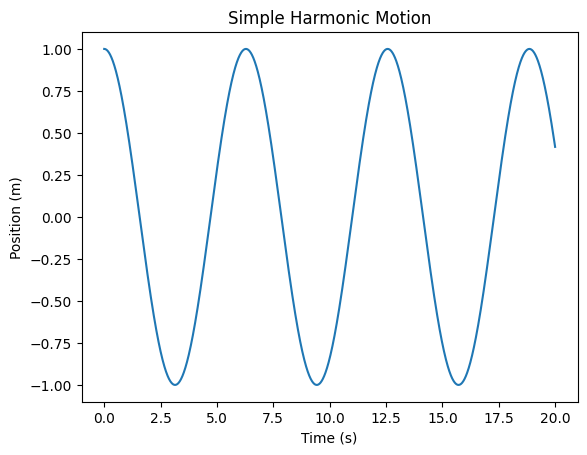

In [21]:
# Step 5: plot the solution
plt.plot(times,position)
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Simple Harmonic Motion')
plt.show()

We could verify our numerical solution be comparing it with the analytical solutions.
The analytical solutions are:

$$
x = A \cos(\omega_0 t + \phi),
$$
and

$$
v = -A \omega_0 \sin(\omega_0 t + \delta).

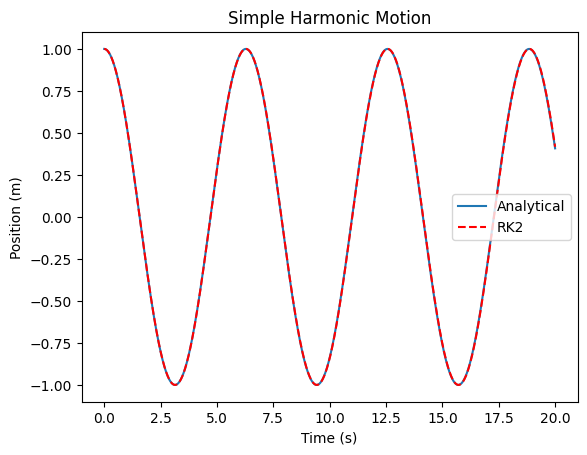

In [31]:
# Step 6: evaluate the analytical solution

# TODO:
position_analytical = A*np.cos(omega0*times)
velocity_analytical = -A*omega0*np.sin(omega0*times)
plt.plot(times,position_analytical,'-',label='Analytical')
plt.plot(times,position,'r--',label='RK2')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Simple Harmonic Motion')
plt.legend()
plt.show()






Another way to chekc the accuray of our numerical solution is to check the energy conservation and the phase-sapce diagram.

Text(0.5, 1.0, 'Energy of the System')

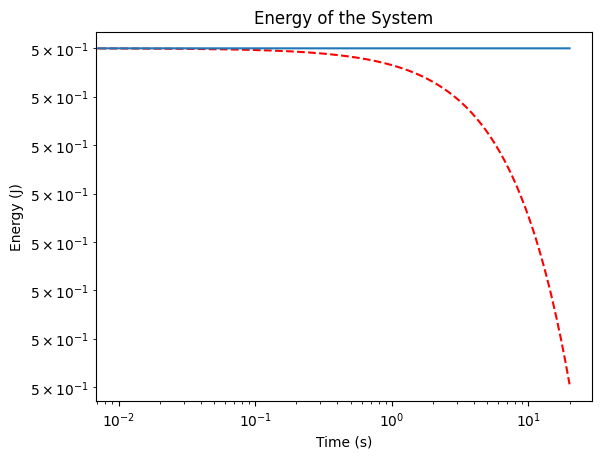

In [33]:
# Step 7: evaluate the energy (error) of the system

# TODO:
energy = 0.5*m*velocity**2 + 0.5*k*position**2
energy_analytical = 0.5*m*velocity_analytical**2 + 0.5*k*position_analytical**2
plt.loglog(times,energy,'r--',label='RK2')
plt.loglog(times,energy_analytical,'-',label='Analytical')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.title('Energy of the System')




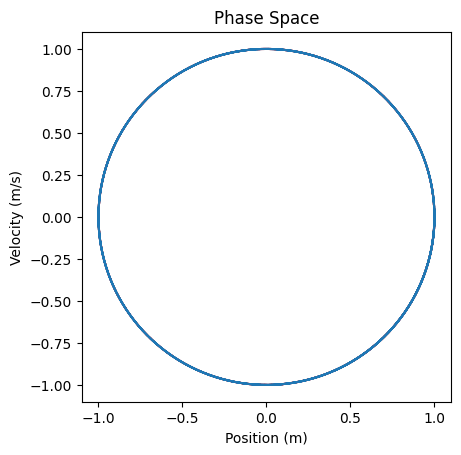

In [24]:
# Step 8: evaluate the phase space

# TODO:
plt.figure()
plt.plot(position,velocity,'r--',label='RK2')
plt.plot(position_analytical,velocity_analytical,'-',label='Analytical')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Position (m)')
plt.ylabel('Velocity (m/s)')
plt.title('Phase Space')
plt.show()





## Exercise 2: Repeat with RK4


In [32]:
#
# This is a simple example of how to solve a simple harmonic oscillator using the RK4 method
#

# TODO:

times = np.linspace(0,T,N)
position = np.zeros(N)
velocity = np.zeros(N)

position[0] = 1
velocity[0] = 0

# Step 3: solve the problem using the RK2 method

def f(t,y):
    return np.array([y[1],-omega0**2*y[0]])

for i in range(1,N):
    y = np.array([position[i-1],velocity[i-1]])
    t = times[i-1]
    h = dt

    k1 = f(t,y)
    k2 = f(t+h/2,y+k1*h/2)
    k3 = f(t+h/2,y+k2*h/2)
    k4 = f(t+h,y+k3*h)
    y_next = y + (h/6)*(k1+2*k2+2*k3+k4)
    position[i] = y_next[0]
    velocity[i] = y_next[1]





